In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
print("Categories 'gender' variable: ", end=" ")
print(df["gender"].unique())

print("Categories 'race/ethnicity': ", end=" ")
print(df["race/ethnicity"].unique())

print("Categories 'parental level of education': ", end=" ")
print(df["parental level of education"].unique())

Categories 'gender' variable:  ['female' 'male']
Categories 'race/ethnicity':  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories 'parental level of education':  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [10]:
# Checking number of categorical and numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print(f"We have {len(numerical_features)} numerical features : {numerical_features}")
print(f"We have {len(categorical_features)} categorical_features : {categorical_features}")


We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical_features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
#  Creating dependent variable
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"] / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [12]:
reading_full = df[df['reading score'] == 100]["average"].count()
writing_full = df[df['writing score'] == 100]["average"].count()
math_full = df[df['math score'] == 100]["average"].count()

print(f'Full in maths: {math_full}')
print(f'Full in writing: {writing_full}')
print(f'Full in reading: {reading_full}')


Full in maths: 7
Full in writing: 14
Full in reading: 17


In [13]:
reading_least = df[df['reading score'] <= 20]["average"].count()
writing_least = df[df['writing score'] <= 20]["average"].count()
math_least = df[df['math score'] <= 20]["average"].count()

print(f'Least in maths: {reading_least}')
print(f'Least in writing: {writing_least}')
print(f'Least in reading: {reading_least}')

Least in maths: 1
Least in writing: 3
Least in reading: 1


<Axes: xlabel='average', ylabel='Count'>

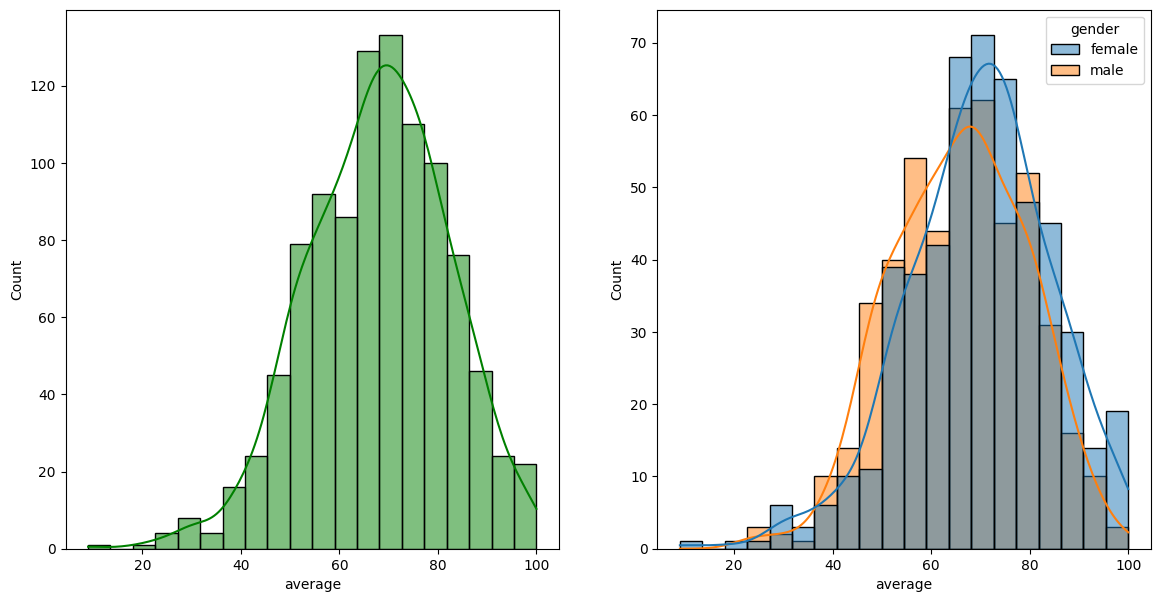

In [14]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df, x="average", kde=True, bins=20,color="g")
plt.subplot(122)
sns.histplot(data=df, x="average", kde=True, bins=20,color="c", hue="gender")

<Axes: xlabel='total score', ylabel='Count'>

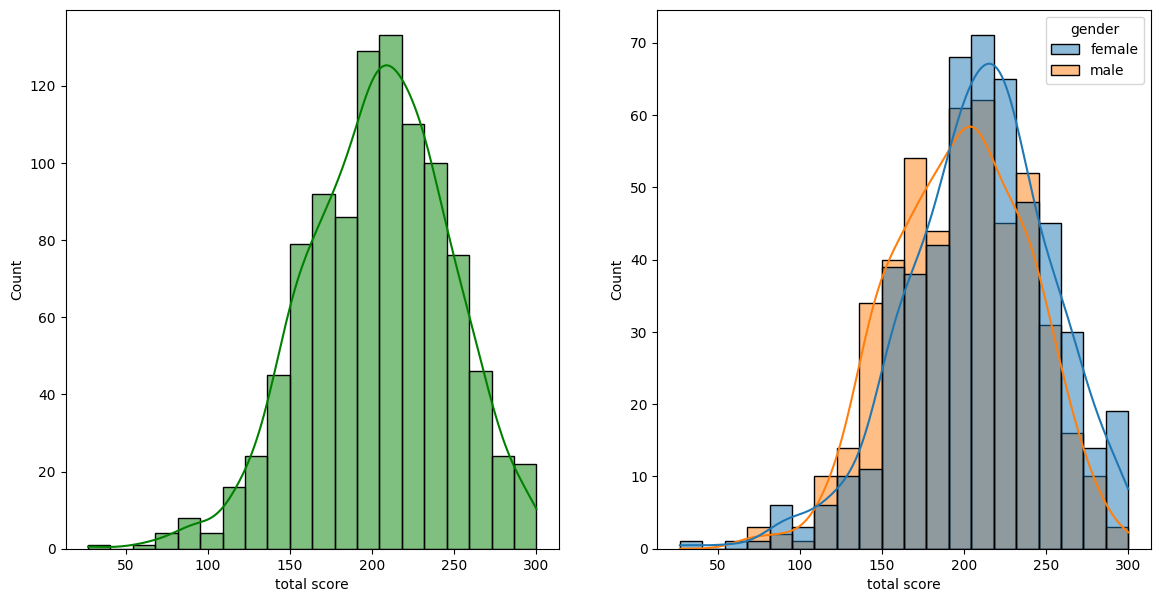

In [15]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df, x="total score", kde=True, bins=20,color="g")
plt.subplot(122)
sns.histplot(data=df, x="total score", kde=True, bins=20,color="c", hue="gender")

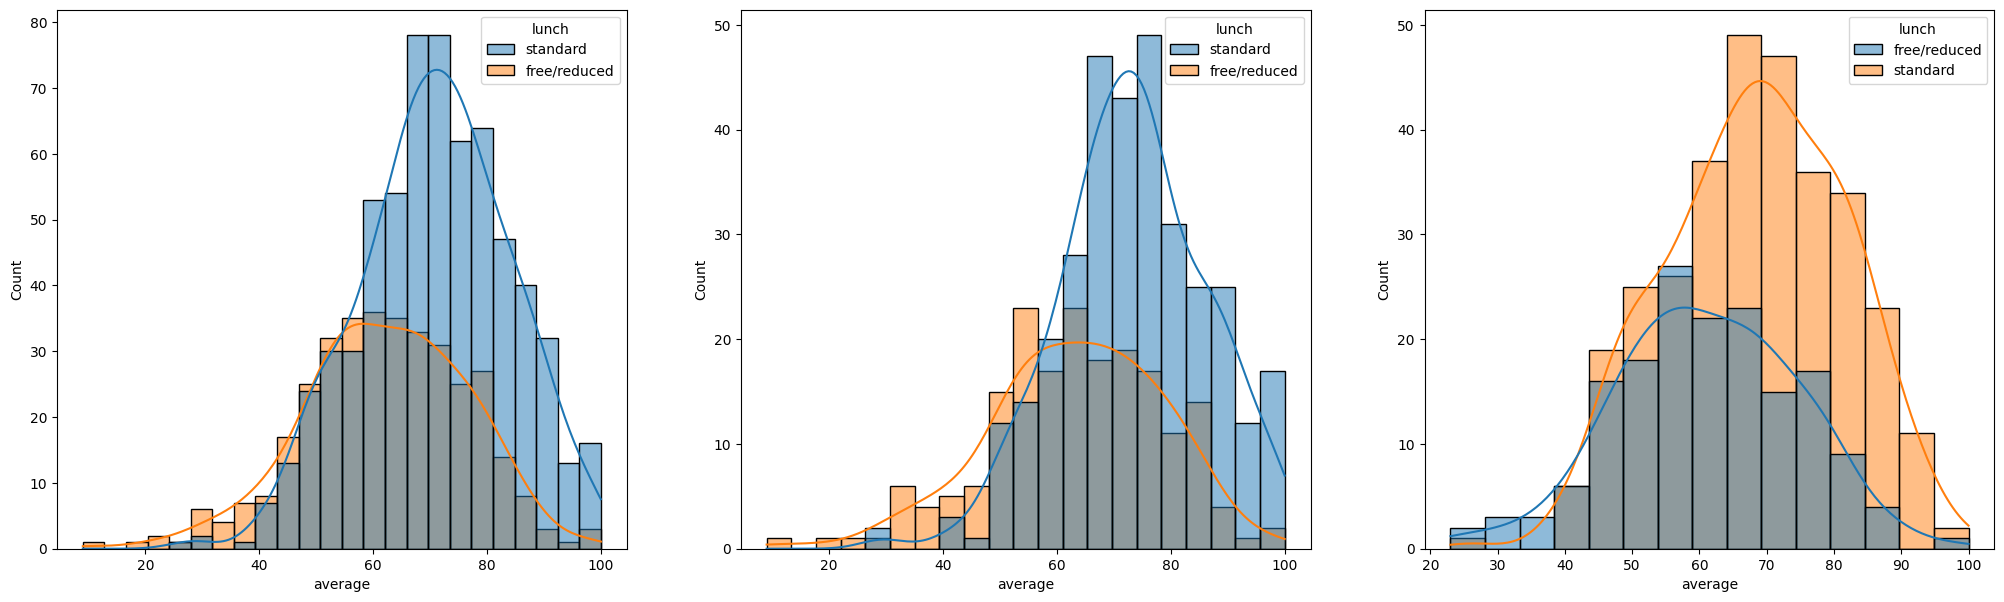

In [16]:
plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
plt.show()
plt.close()

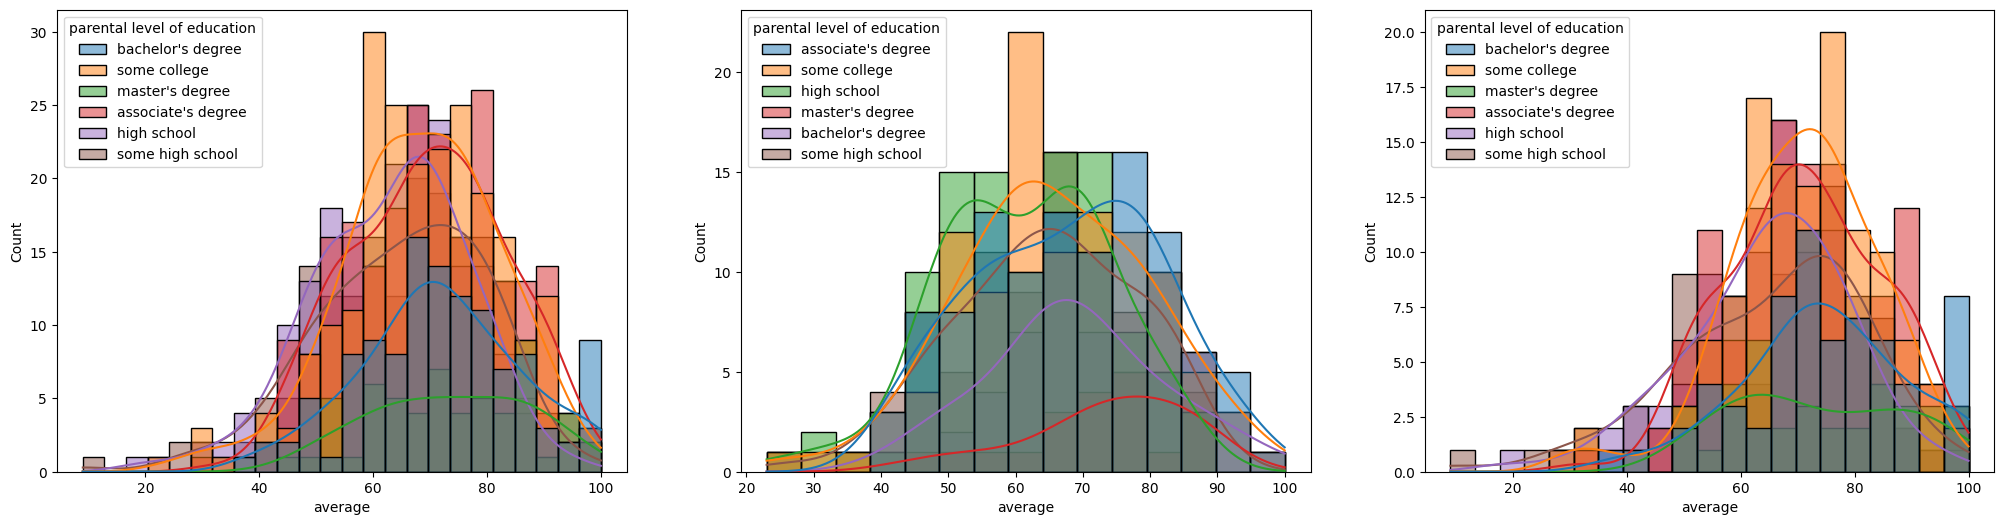

In [17]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental level of education')
plt.show()
plt.close()